In [16]:
import os
import model_loader
import pipeline

from PIL import Image
import torch
from transformers import CLIPTokenizer
import numpy as np
import math
from pathlib import Path
DEVICE = 'cpu'

ALLOW_CUDA = False
ALLOW_MPS = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = 'cuda'
elif (torch.backends.mps.is_built() or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = 'mps'

print(f"Using DEIVICE: {DEVICE}")

tokenizer_folder_path = os.path.join(Path(os.getcwd()).parent, 'tokenizer_files')
tokenizer = CLIPTokenizer(
    os.path.join(tokenizer_folder_path, 'tokenizer_vocab.json'),
    merges_file=os.path.join(tokenizer_folder_path, 'tokenizer_merges.txt')
    )


model_file = '/Users/aram/Documents/repos/asds/statistics/diffusion-journey/checkpoints/diffusion_pretrained/v1-5-pruned-emaonly.ckpt'
models = model_loader.preload_models_from_standard_weights(model_file, device=DEVICE)

# Text to image

prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution"
uncond_prompt = ''
do_cfg = True

cfg_scale = 7

# IMAGE TO IMAGE

input_image = None
image_path = ''
# input_image = Image.open(image_path)
strength = 0.5


Using DEIVICE: mps


In [17]:
sampler = 'ddpm'
num_inference_steps = 5
seed = 42
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device='cpu',
    tokenizer=tokenizer,
)

100%|██████████| 5/5 [00:07<00:00,  1.47s/it]


before decoder tensor([[[[4.4848e+18, 6.2432e-05, 6.7648e-03,  ..., 3.0657e+17,
           8.9142e+27, 2.4712e+16],
          [5.3288e+21, 1.8289e+04, 1.9025e+21,  ..., 2.2076e+00,
           4.3426e+21, 1.9125e+15],
          [1.0536e+14, 2.8109e+10, 6.1321e+02,  ..., 1.0986e+09,
           4.3580e+04, 2.0687e+23],
          ...,
          [6.8960e+30, 4.5697e+14, 3.7167e+05,  ..., 2.3466e+05,
           6.3300e-05, 2.3854e+19],
          [1.4985e-03, 4.5203e+03, 6.0564e+17,  ..., 1.2232e-03,
           1.4474e+26, 1.0783e+19],
          [2.0440e-03, 1.4182e+07, 1.4552e+02,  ..., 2.7131e-07,
           2.9579e+13, 8.7313e-02]],

         [[1.1904e+01, 8.0198e+20, 1.5826e+26,  ..., 6.9930e+34,
           1.4780e+10, 4.5045e+04],
          [2.5664e+20, 5.8411e+14, 1.1854e+07,  ..., 4.4123e+14,
           4.2981e+28, 2.8708e+09],
          [1.6333e+14, 1.9302e+26, 4.8618e+17,  ..., 6.0892e+21,
           1.8103e+31, 6.0492e+07],
          ...,
          [3.4509e+23, 5.4468e+18, 2.0019e+2

In [3]:
output_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

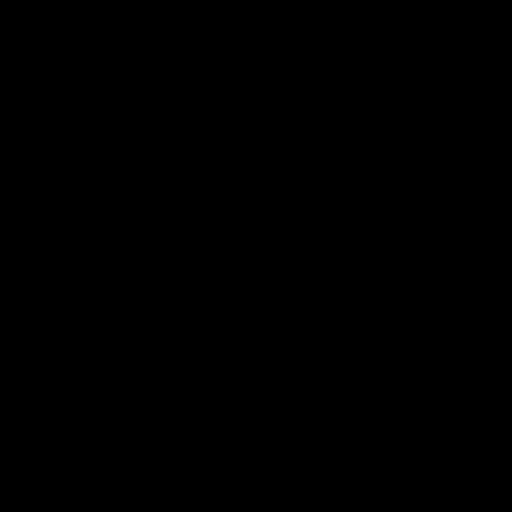

In [4]:
Image.fromarray(output_image)

In [5]:
output_image


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)